<a href="https://colab.research.google.com/github/NilotpalMaitra/TRI-NIT-Hackathon-/blob/main/yolov8_object_detection_on_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Mar 10 00:14:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 87.5MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 110MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 115.5ms
Speed: 15.9ms preprocess, 115.5ms inference, 826.4ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


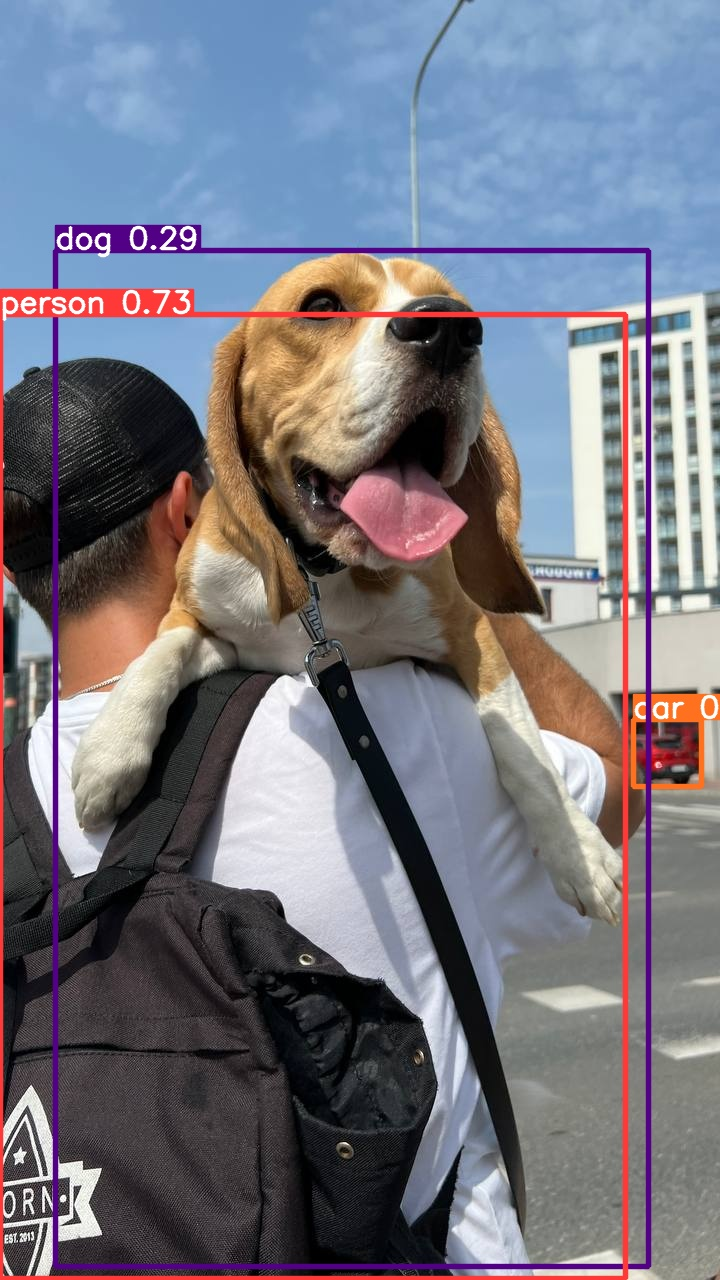

In [6]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [7]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 183.7ms
Speed: 7.8ms preprocess, 183.7ms inference, 643.2ms postprocess per image at shape (1, 3, 640, 384)


In [8]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [9]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [10]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [11]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("road-damage-detectiontrinit-mkkkp").project("road-damage-detection-tri-nit")
version = project.version(7)
dataset = version.download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Road-Damage-Detection(TRI-NIT)-7 in yolov8:: 100%|██████████| 13604/13604 [00:04<00:00, 3022.13it/s]


## Custom Training

In [21]:
!pip install -U ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.1/720.1 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uninstalled ultralytics-8.0.196


In [23]:
import os

file_path = '/content/datasets/Road-Damage-Detection(TRI-NIT)-7/data.yaml'
if os.path.exists(file_path):
    print("File exists.")
else:
    print("File does not exist.")



File exists.


In [24]:
if os.path.exists(file_path):
    with open(file_path, 'r') as file:
        print(file.read())


names:
- '0'
- D00
- D00-Grass-
- D00-Marketing board-
- D01
- D01-Sand-
- D10
- D10-Drain cover-
- D11-Road Damage-
- D20
- D40
- D43
- D43-Highway stretch marks-
- D44
- D50
- Fisuras
- KengCao_heavy
- Pothole
- bicycle
- bus
- car
- closed manhole
- motorbike
- person
- traffic light
nc: 25
roboflow:
  license: CC BY 4.0
  project: road-damage-detection-tri-nit
  url: https://universe.roboflow.com/road-damage-detectiontrinit-mkkkp/road-damage-detection-tri-nit/dataset/7
  version: 7
  workspace: road-damage-detectiontrinit-mkkkp
test: test/images
train: train/images
val: valid/images



In [29]:
%cd /content
!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/Road-Damage-Detection\(TRI-NIT\)-7/data.yaml epochs=20 imgsz=1000 plots=True


/content
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Road-Damage-Detection(TRI-NIT)-7/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=1000, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

In [32]:
!ls {HOME}/runs/detect/train7


args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1710031420.3d837bd1044c.7824.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch3320.jpg  weights
P_curve.png					    train_batch3321.jpg
PR_curve.png					    train_batch3322.jpg


/content


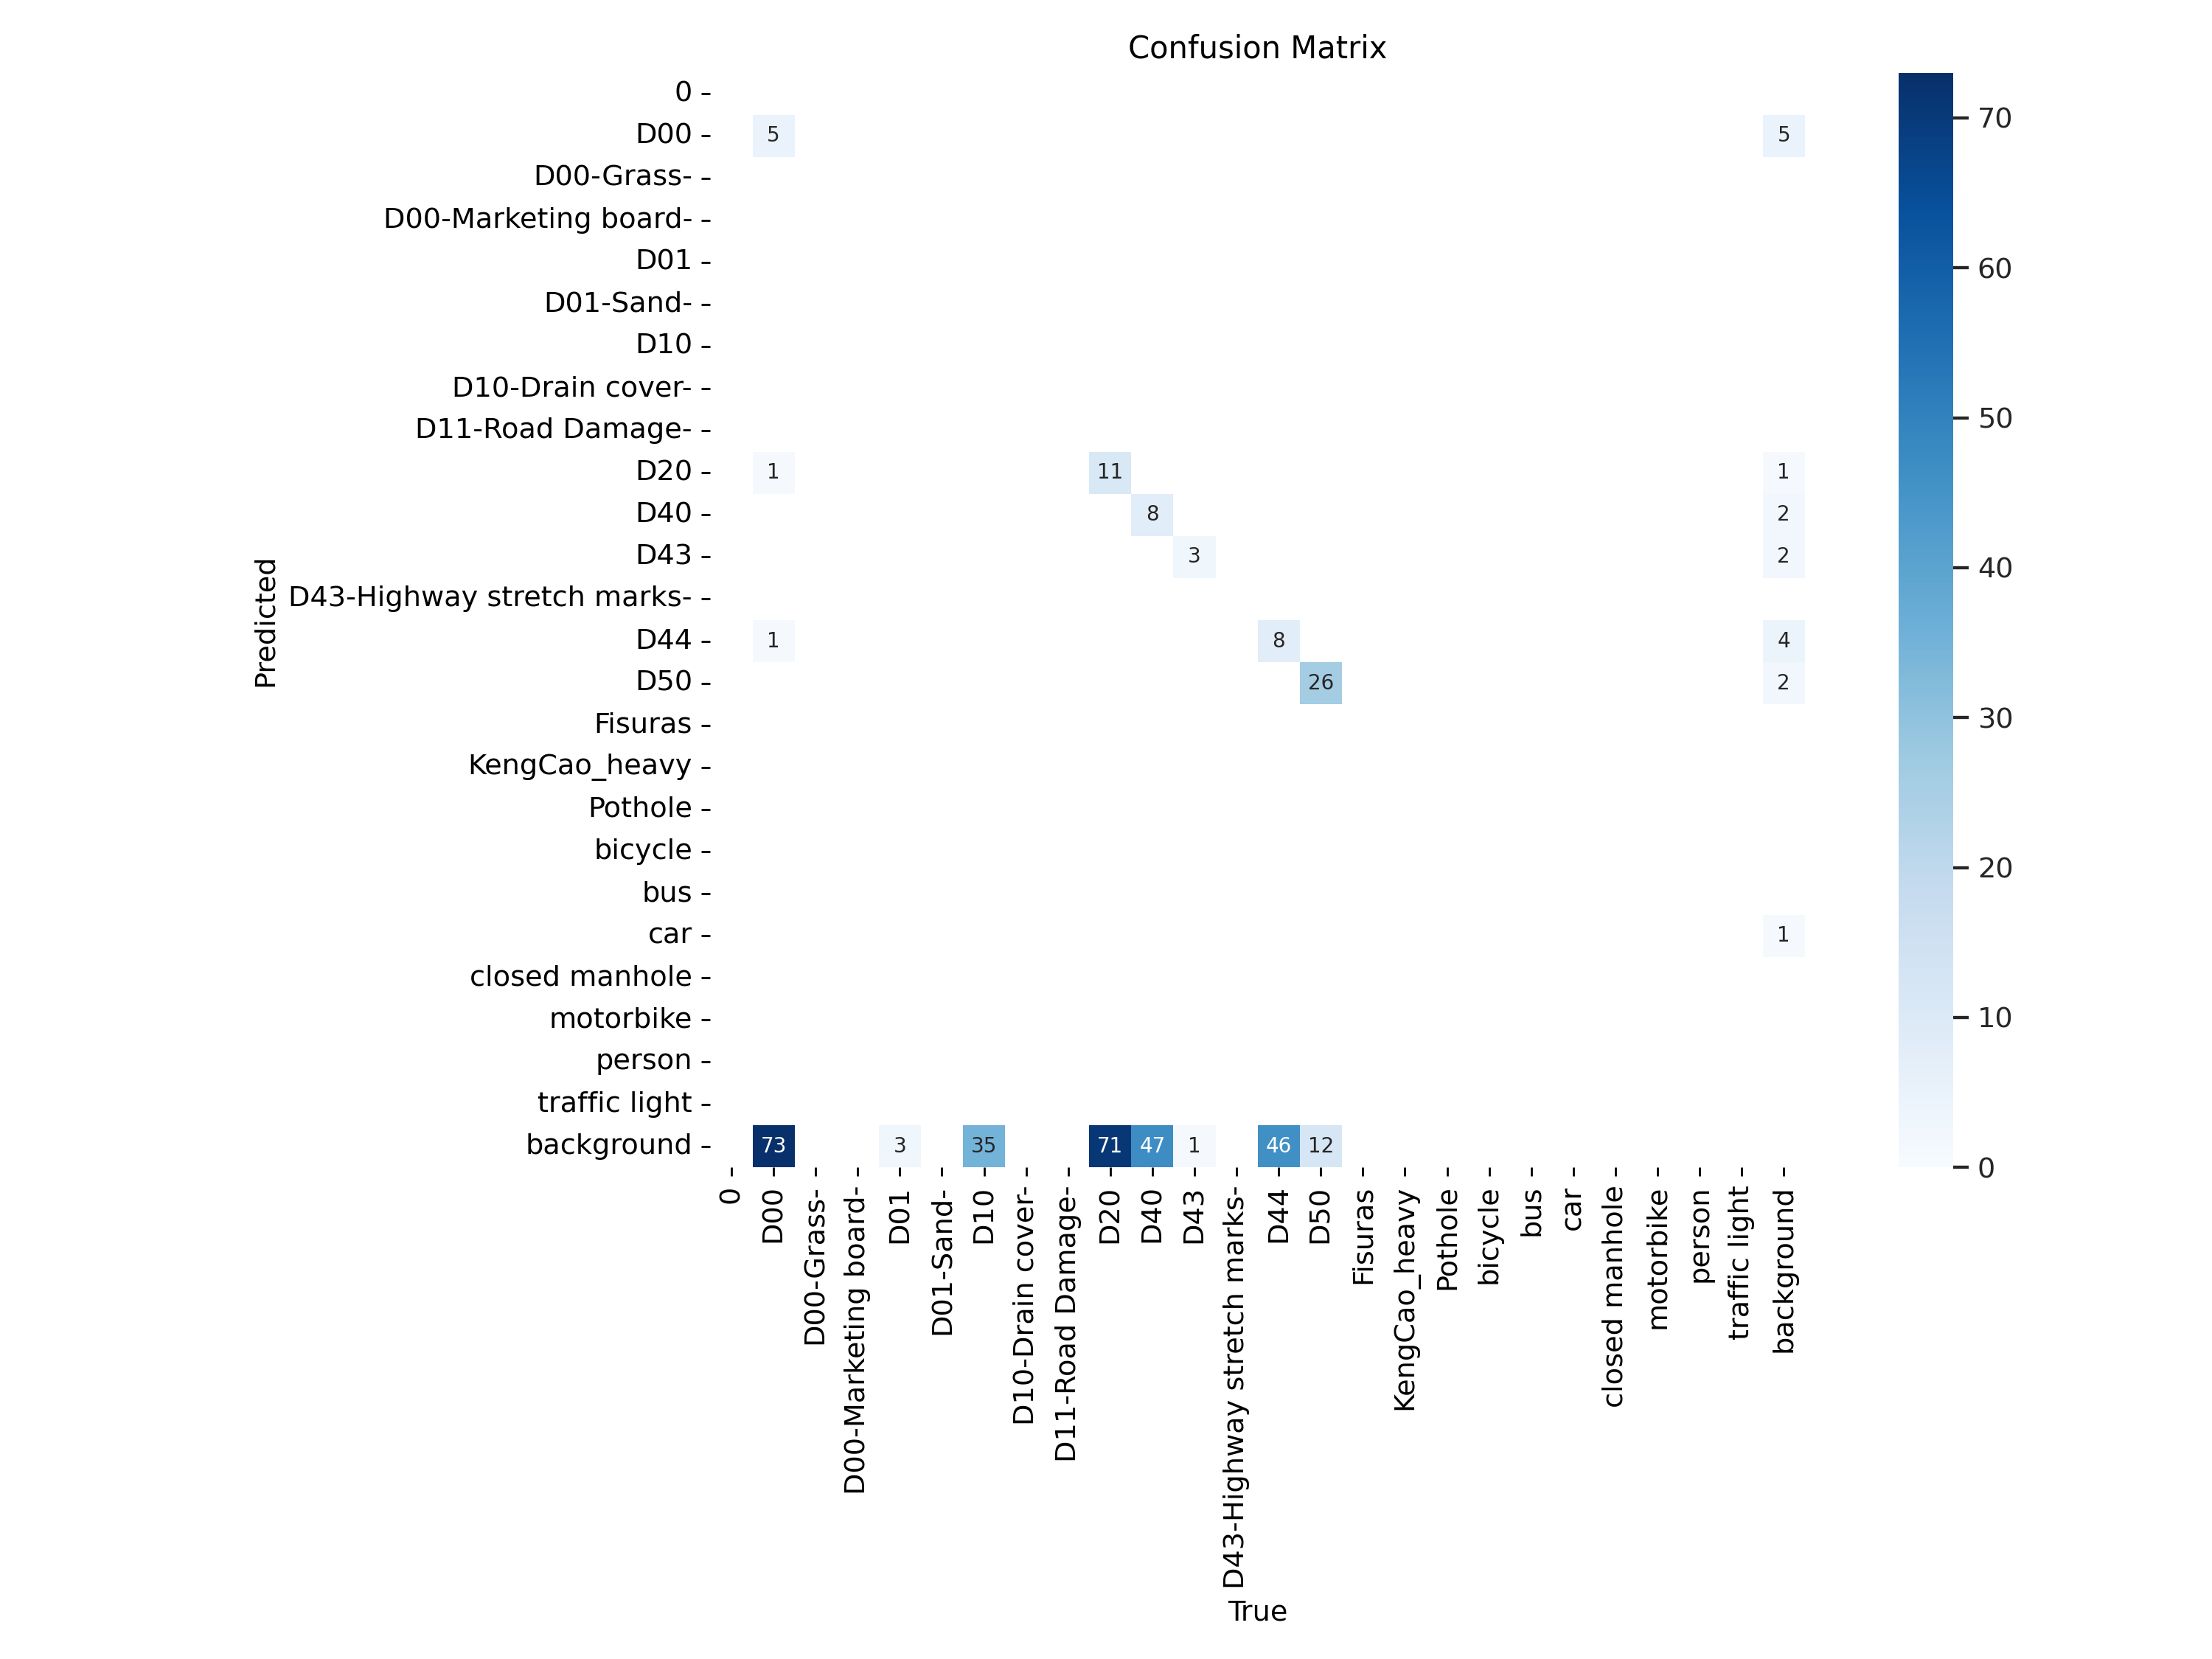

In [33]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/confusion_matrix.png', width=600)

/content


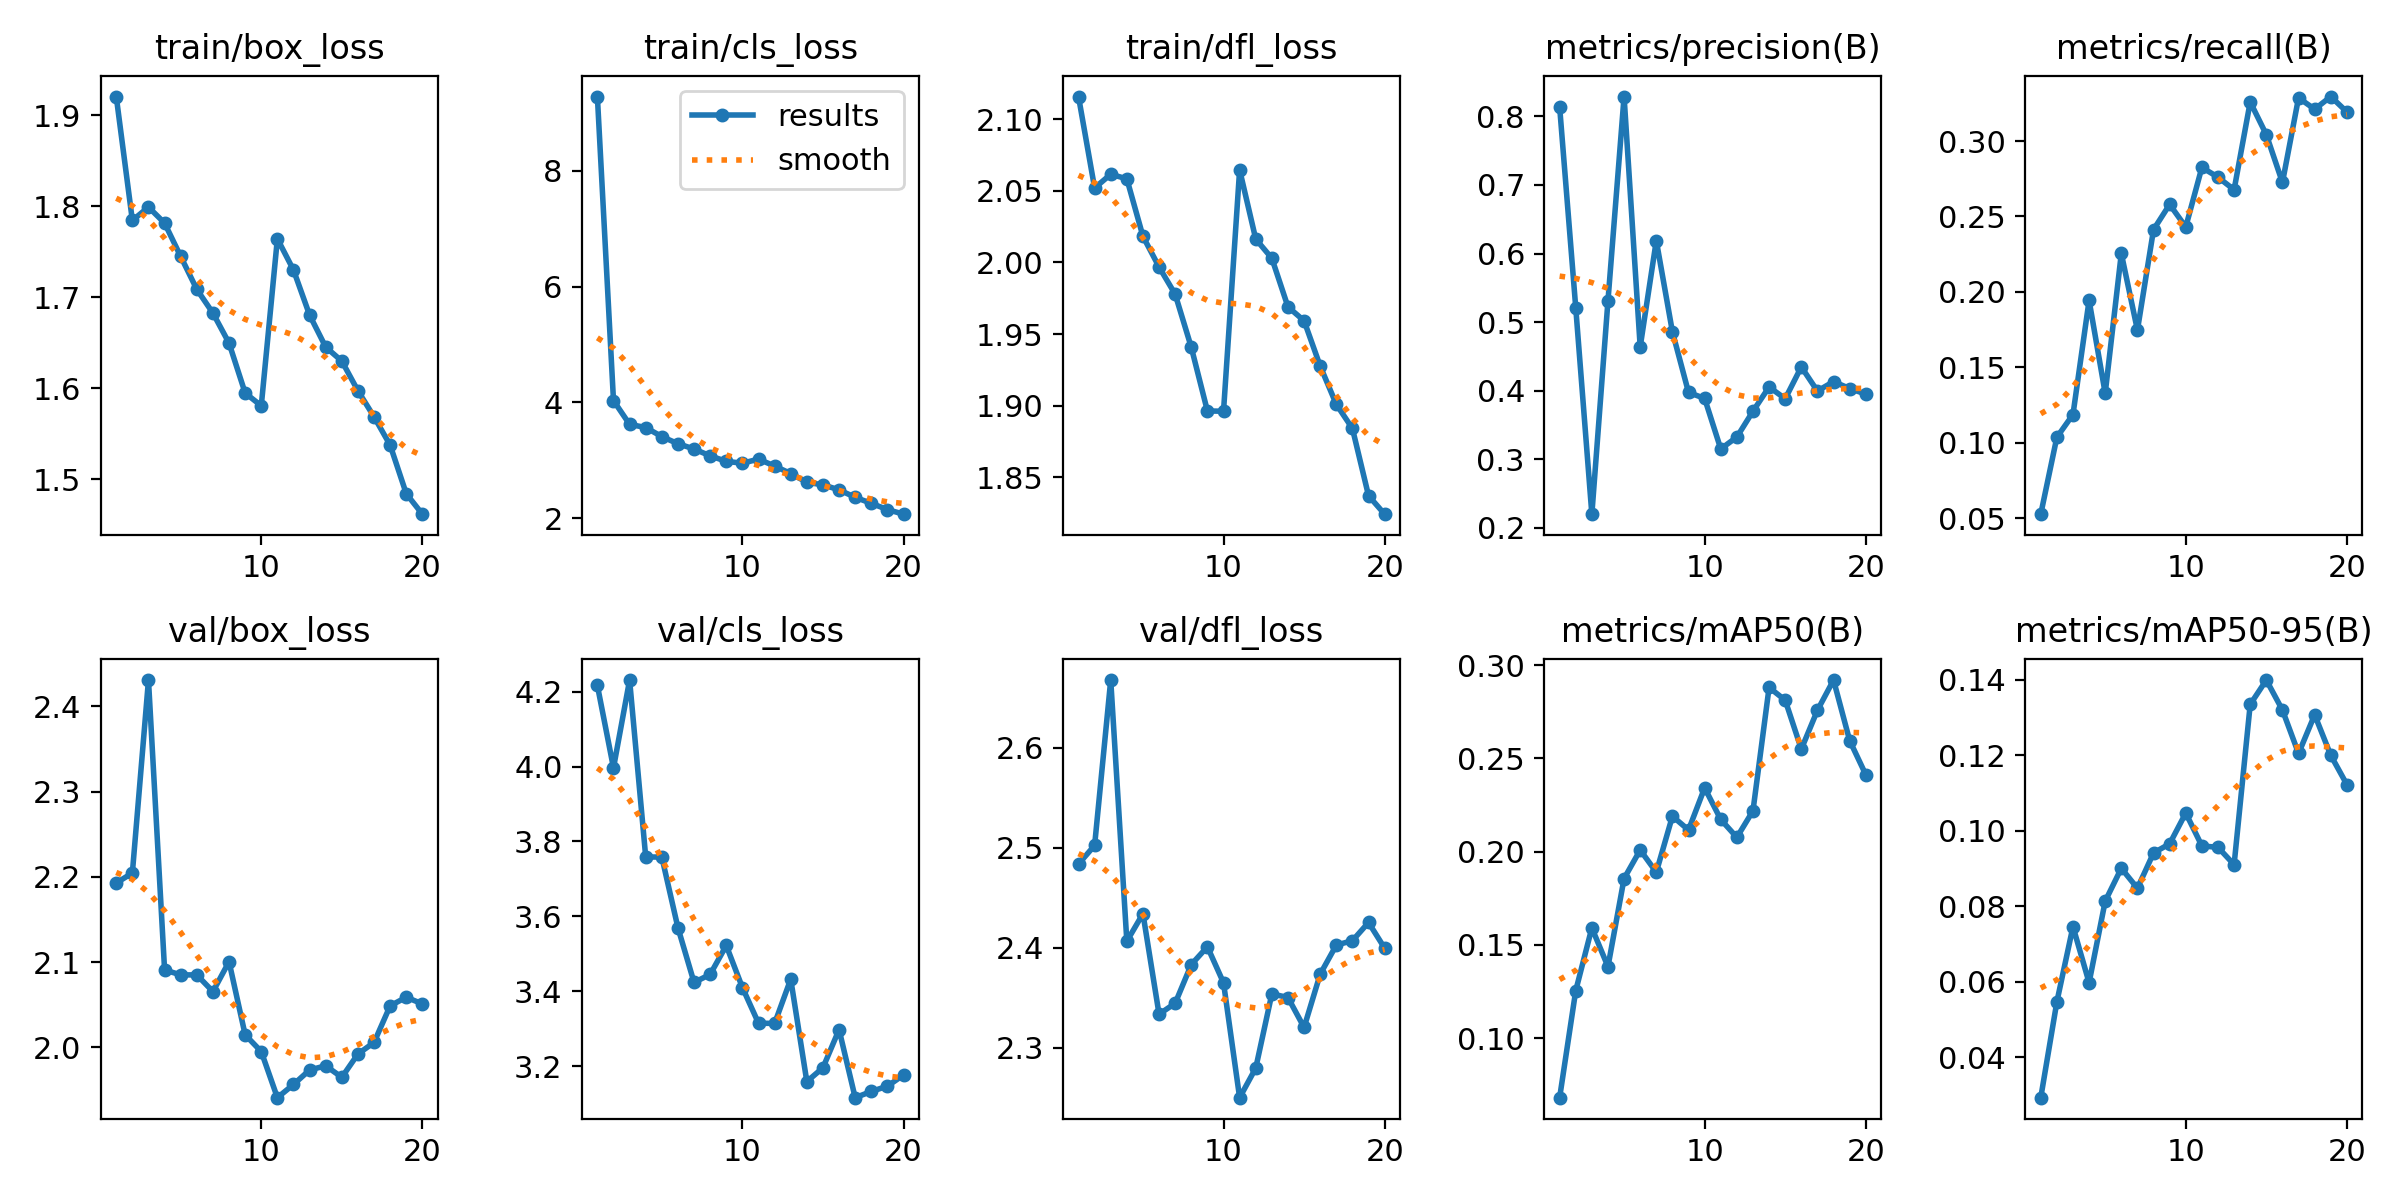

In [34]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/results.png', width=600)

/content


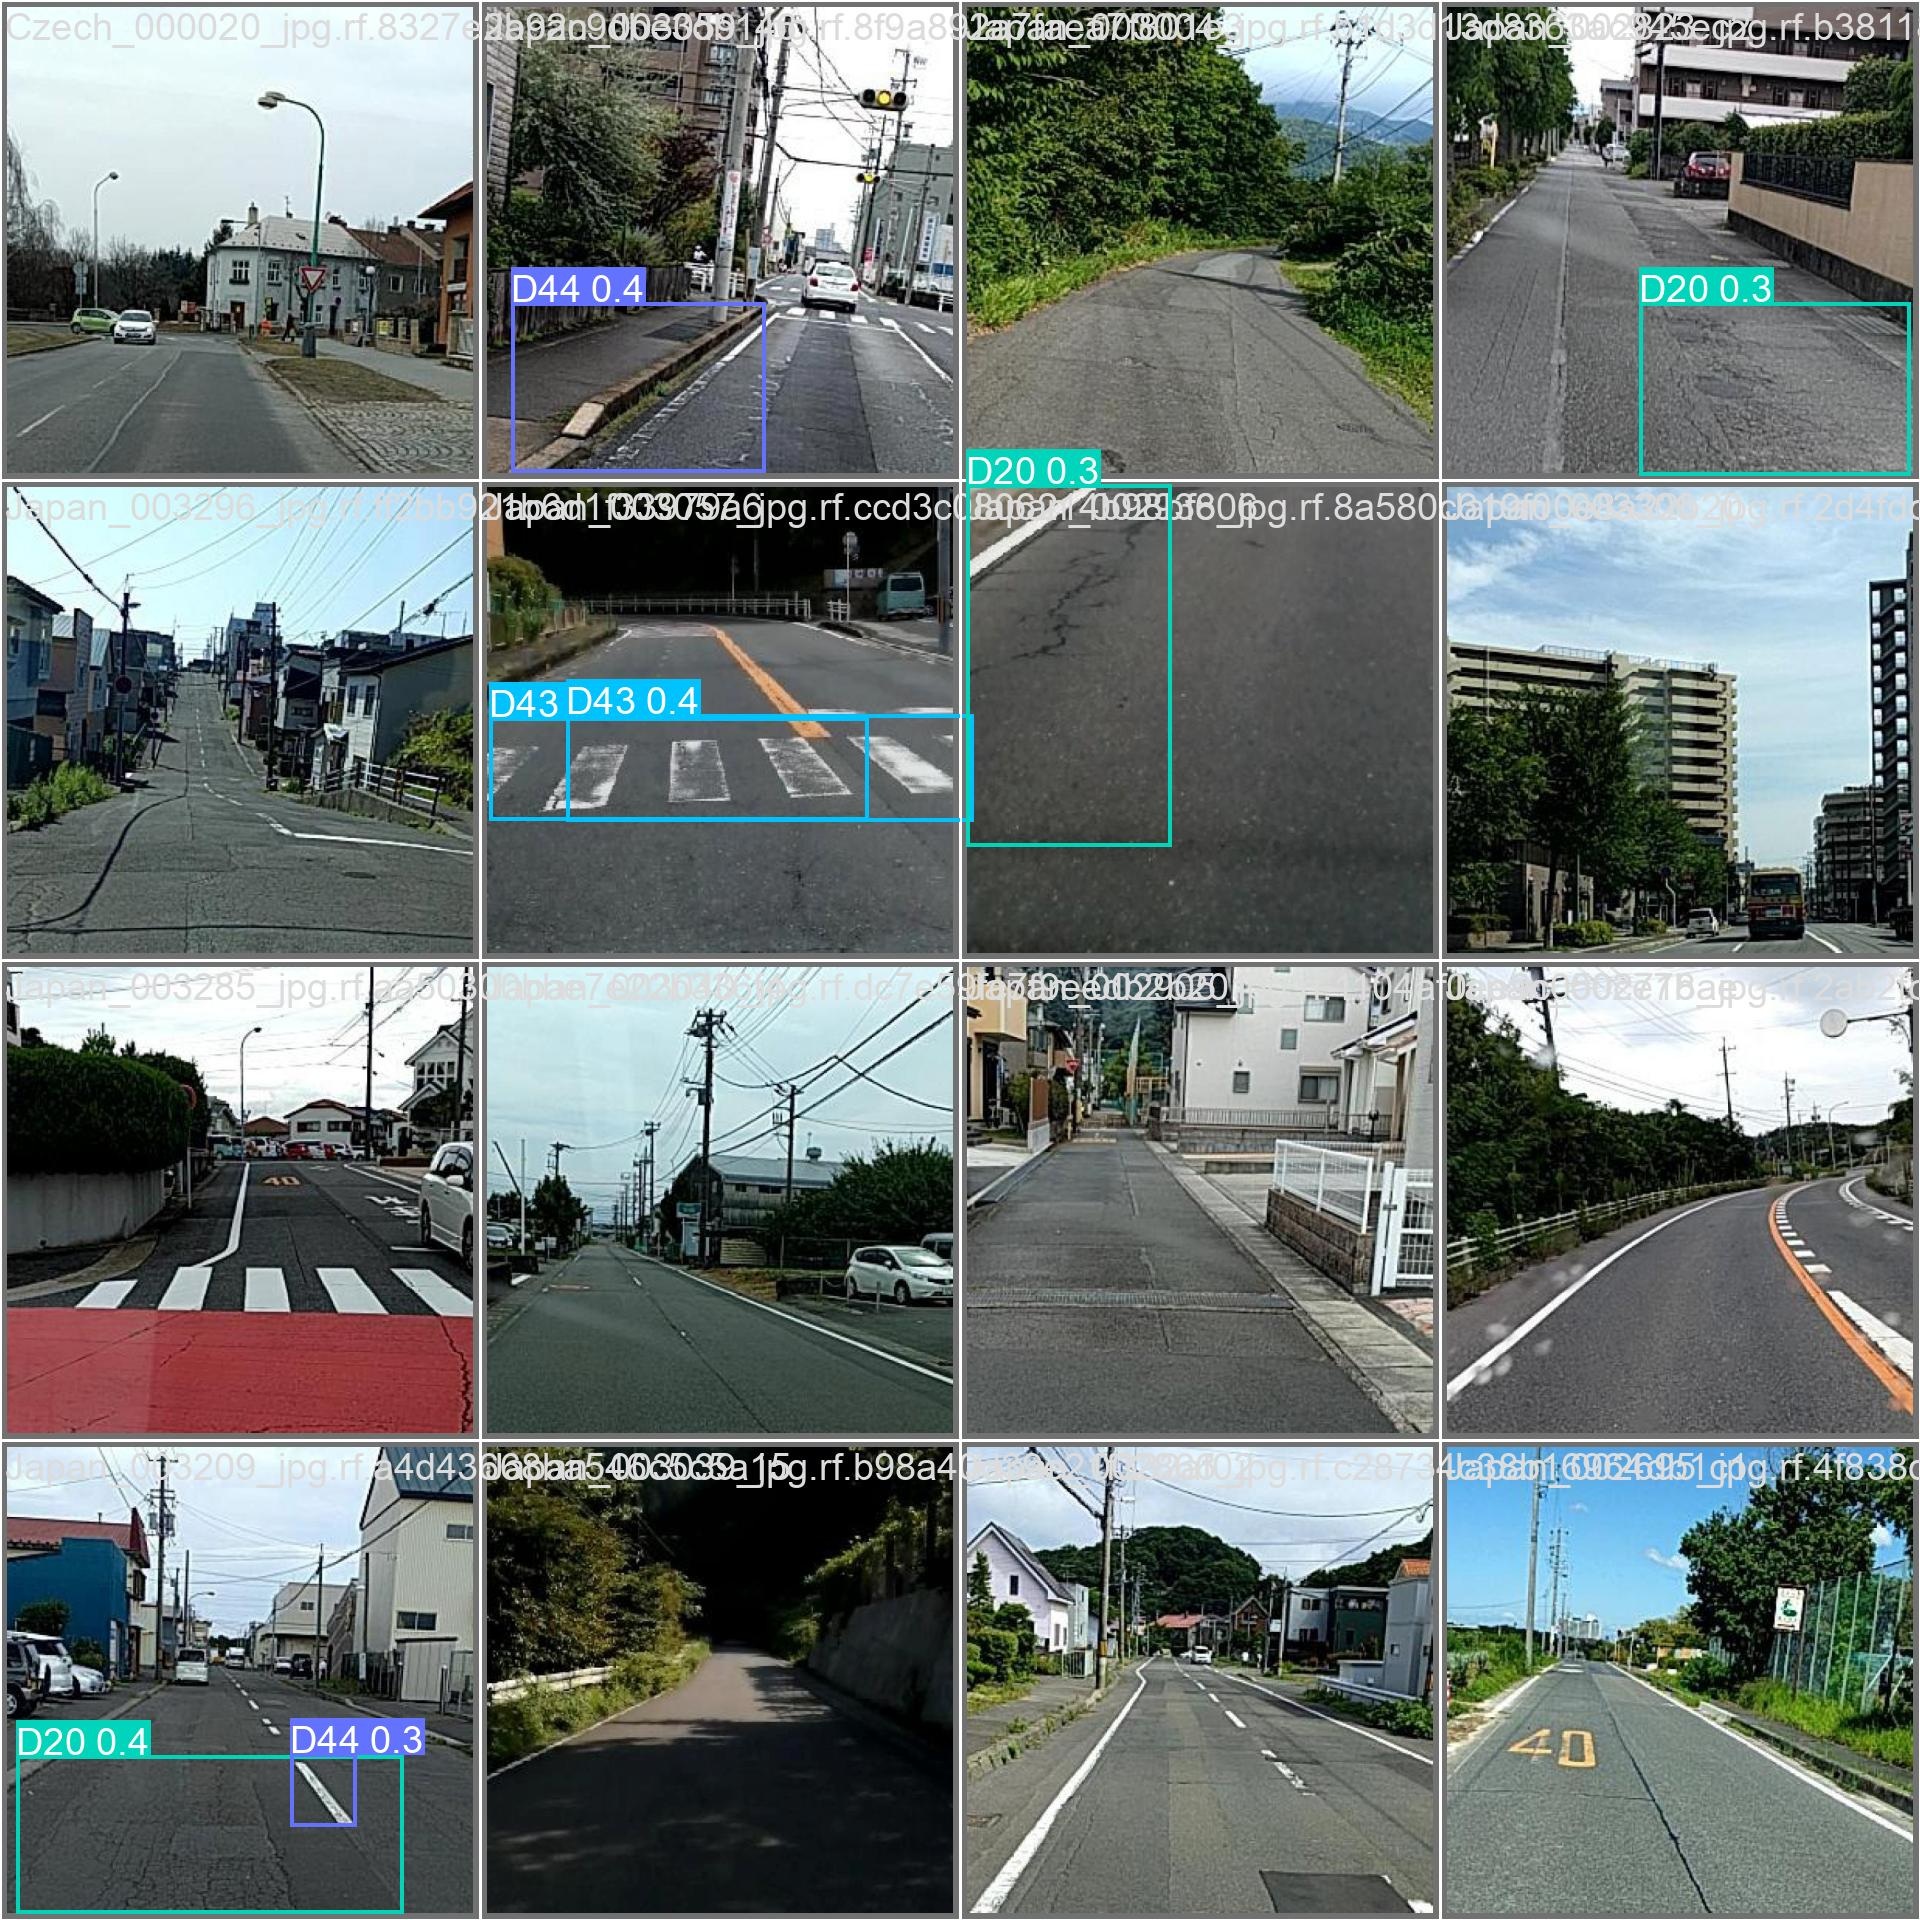

In [35]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [37]:
%cd /content

!yolo task=detect mode=val model=/content/runs/detect/train7/weights/best.pt data=/content/datasets/Road-Damage-Detection\(TRI-NIT\)-7/data.yaml


/content
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11135259 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Road-Damage-Detection(TRI-NIT)-7/valid/labels.cache... 488 images, 288 backgrounds, 0 corrupt: 100% 488/488 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 31/31 [00:19<00:00,  1.62it/s]
                   all        488        351      0.377       0.31       0.28       0.14
                   D00        488         80      0.197      0.188     0.0989     0.0394
                   D01        488          3          1          0     0.0126    0.00381
                   D10        488         35      0.273     0.0286      0.135     0.0521
                   D20        488         82       0.28      0.232      0.238      0.091
                   D40        488         55      0.307      0.218      0.151     0.0554
      

## Inference with Custom Model

In [1]:
%cd /content

!yolo task=detect mode=predict model=/content/runs/detect/train7/weights/best.pt conf=0.25 source=/content/datasets/Road-Damage-Detection\(TRI-NIT\)-7/test/images save=True


/content
/bin/bash: line 1: yolo: command not found


**NOTE:** Let's take a look at few results.

In [41]:
import os
import glob
from IPython.display import Image, display

home_dir = "/content"  # Replace this with the actual path to your home directory

for image_path in glob.glob(os.path.join(home_dir, 'runs', 'detect', 'predict3', '*.jpg'))[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")


In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred